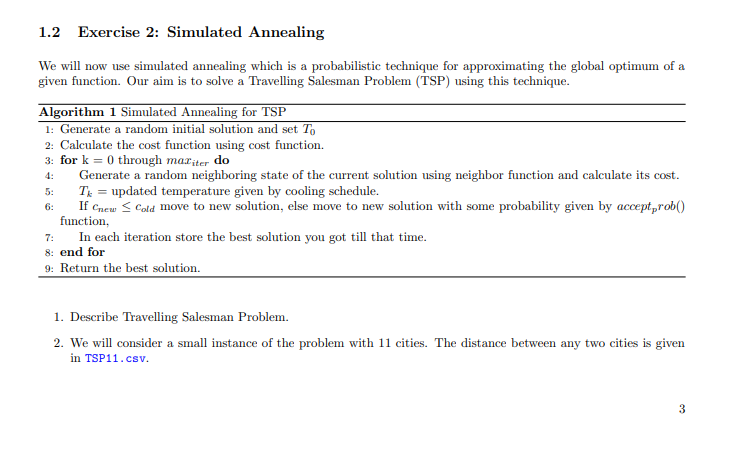

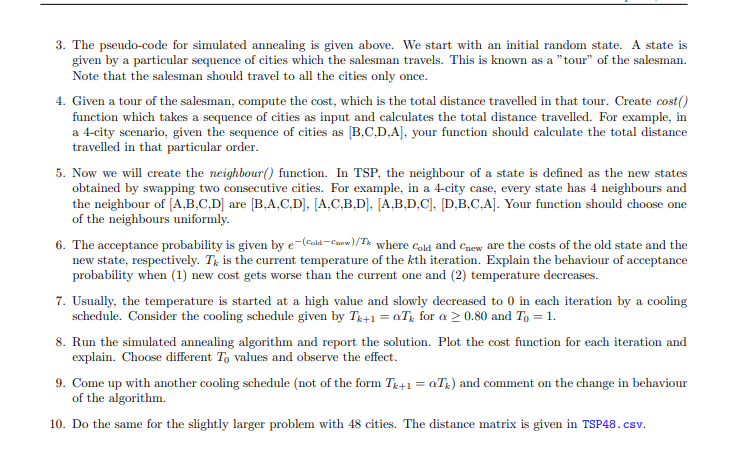

#Question 1

The Travelling Salesman Problem (TSP) is a classic optimization problem where the objective is to find the shortest possible route that visits a given set of cities exactly once and returns to the original city. Mathematically, the TSP can be formulated as follows:

Given:

A set of cities $C = \{1, 2, ..., n\}$ where $n$ is the total number of cities.
The distance or cost $d_{ij}$ between each pair of cities $i$ and $j$, where $d_{ij}$ represents the distance from city $i$ to city $j$.
Binary decision variables $x_{ij}$ representing whether the route includes the edge from city $i$ to city $j$.
Objective:
Minimize: $\sum_{(i,j) \in E} d_{ij} \cdot x_{ij}$

Subject to:

Every city is visited exactly once:
$\sum_{j \in C, j \neq i} x_{ij} = 1$ for all $i \in C$
$\sum_{i \in C, i \neq j} x_{ij} = 1$ for all $j \in C$

Sub-tour elimination:
$\sum_{(i,j) \in \delta(S)} x_{ij} \geq 2$ for all $\phi \subset S \subset C$, $\phi \neq \emptyset$, $S \neq C$
Where $\delta(S)$ represents the set of edges incident to the vertices in subset $S$ of cities.

Binary variable constraints:
$x_{ij} \in \{0, 1\}$ for all $(i,j) \in E$

The objective is to minimize the total distance traveled, subject to the constraints that each city is visited exactly once and sub-tours are eliminated.

The TSP is NP-hard, indicating the difficulty of finding an optimal solution. Therefore, heuristic and approximation algorithms, such as simulated annealing, are commonly employed to find near-optimal solutions efficiently.

#Question 2

In [31]:
import pandas as pd
import numpy as np


In [32]:
df=pd.read_csv('/content/TSP11.csv' , header=None)

In [33]:
df.index= [ i for i in range(1,12)]
df.columns =[i for i in range(1,12)]

In [34]:
df

1   2   3   4   5   6    7   8    9   10  11
1     0  29  20  21  16  31  100  12    4  31  18
2    29   0  15  29  28  40   72  21   29  41  12
3    20  15   0  15  14  25   81   9   23  27  13
4    21  29  15   0   4  12   92  12   25  13  25
5    16  28  14   4   0  16   94   9   20  16  22
6    31  40  25  12  16   0   95  24   36   3  37
7   100  72  81  92  94  95    0  90  101  99  84
8    12  21   9  12   9  24   90   0   15  25  13
9     4  29  23  25  20  36  101  15    0  35  18
10   31  41  27  13  16   3   99  25   35   0  38
11   18  12  13  25  22  37   84  13   18  38   0

#Question 3

The given pseudocode outlines the Simulated Annealing algorithm for solving the Traveling Salesman Problem (TSP). In this algorithm, the initial random state represents an initial tour of the salesman where the cities are visited in a certain sequence.

The objective is to find the best tour that minimizes the total distance traveled by the salesman while visiting each city exactly once and returning to the starting city. The algorithm iterates through random neighboring states, which represent different permutations of the cities in the tour. These neighboring states are evaluated based on their cost, which is the total distance of the tour.

In [35]:
import random
num_of_cities=len(df)

def generate_initial_tour(num_of_cities):
   cities=list(range(1,num_of_cities +1))   #create the list of the cities
   random.shuffle(cities)   #shuffle random tour
   return cities

initial_tour=generate_initial_tour(num_of_cities)

In [36]:
generate_initial_tour(11)

[7, 5, 3, 4, 1, 9, 2, 11, 6, 8, 10]

#Question 4

In [37]:
def cost_function(tour, cost_matrix):
    total_cost = sum(cost_matrix[tour[i-1]][tour[i]] for i in range(len(tour)))
    return total_cost

In [38]:
cost_function(generate_initial_tour(11), df)

390

#Question 5

In [39]:
def neighbour(tour):
    # Generate a random index to swap
    index = random.randint(0, len(tour) - 2)

    # Create the neighbor by swapping two consecutive cities
    new_tour = tour[:]
    new_tour[index], new_tour[index + 1] = new_tour[index + 1], new_tour[index]
    return new_tour

#Example usage:
current_tour = ['A', 'B', 'C', 'D']
new_tour = neighbour(current_tour)
print("Neighboring tour:", new_tour)


Neighboring tour: ['A', 'B', 'D', 'C']


#Question 6

The  Simulated Annealing algorithm determines whether to accept a worse solution based on the change in cost and the current temperature. Let's discuss the behavior of acceptance probability in two scenarios:

When the new cost gets worse than the current one (cnew > cold):

 - In this case, the acceptance probability is determined by the expression e^(-(cnew - cold) / Tk). Since (cnew - cold) is positive (indicating an increase in cost), the exponent term becomes more negative as the difference between the new and current costs increases.

 - As the exponent term becomes more negative, e^(-(cnew - cold) / Tk) approaches zero. This means that the probability of accepting a worse solution decreases exponentially as the difference between the new and current costs increases.

 - In practical terms, as the new solution becomes significantly worse than the current one, the probability of accepting it decreases towards zero, favoring the selection of better solutions.

 When the temperature decreases (Tk decreases):

- As the temperature decreases, the denominator Tk in the acceptance probability expression decreases.
- Since Tk appears in the denominator of the exponent term, a decrease in temperature results in a larger exponent, making e^(-(cnew - cold) / Tk) smaller.
- Therefore, as the temperature decreases, the acceptance probability decreases. This means that the algorithm becomes less likely to accept worse solutions as the temperature decreases, which aligns with the annealing process in metallurgy, where materials cool down and solidify into more stable states.

#Question 7

In [40]:
import math

def cooling_schedule(Tk):
    return 0.8 * Tk
    # Implement logic to update the temperature given by the cooling schedule

def accept_prob(current_cost, old_cost, Tk):
    return math.exp(-(old_cost - current_cost) / Tk)

#Question 8

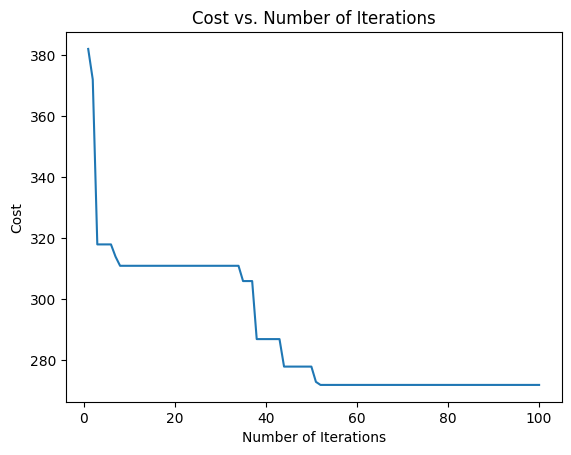

Best solution: [7, 9, 1, 4, 6, 10, 5, 8, 3, 11, 2]


In [41]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing_tsp(initial_solution, maxiter, cost_matrix, T0):
    current_solution = initial_solution[:]
    best_solution = current_solution[:]
    Tk = T0
    costs = []
    for k in range(maxiter):
        neighbor_solution = neighbour(current_solution)
        current_cost = cost_function(current_solution, cost_matrix)
        neighbor_cost = cost_function(neighbor_solution, cost_matrix)
        Tk = cooling_schedule(Tk)

        if neighbor_cost <= current_cost:
            current_solution = neighbor_solution
            if neighbor_cost < cost_function(best_solution, cost_matrix):
                best_solution = neighbor_solution
        else:
            acceptance_prob = accept_prob(current_cost, neighbor_cost, Tk)
            if random.random() < acceptance_prob:
                current_solution = neighbor_solution

        costs.append(current_cost)

    return best_solution, costs

# Example usage:
initial_solution = generate_initial_tour(11)
maxiter = 100
cost_mat = df
T0 = 1
result, costs = simulated_annealing_tsp(initial_solution, maxiter, cost_mat, T0)

# Plot cost against number of iterations
plt.plot(range(1, maxiter + 1), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations')
plt.show()

print("Best solution:", result)


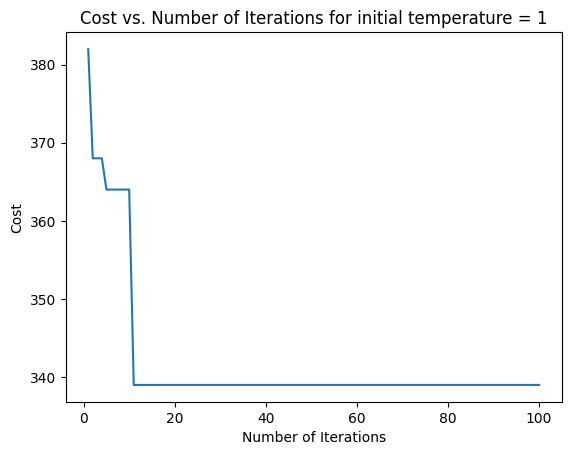

Best solution for initial temperature = 1 is [7, 1, 10, 4, 3, 9, 5, 6, 8, 11, 2]


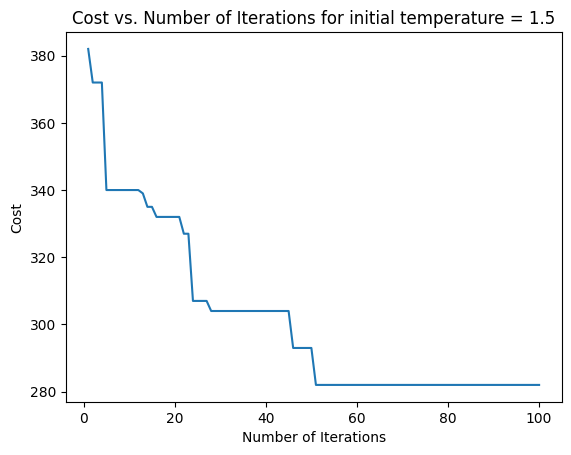

Best solution for initial temperature = 1.5 is [9, 1, 7, 6, 10, 4, 5, 8, 3, 2, 11]


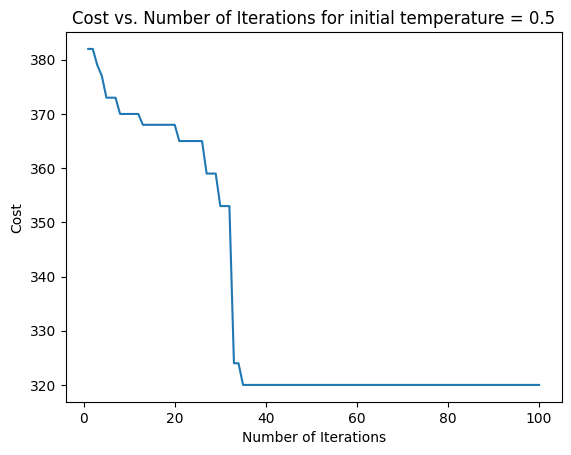

Best solution for initial temperature = 0.5 is [9, 1, 10, 7, 3, 5, 4, 6, 8, 2, 11]


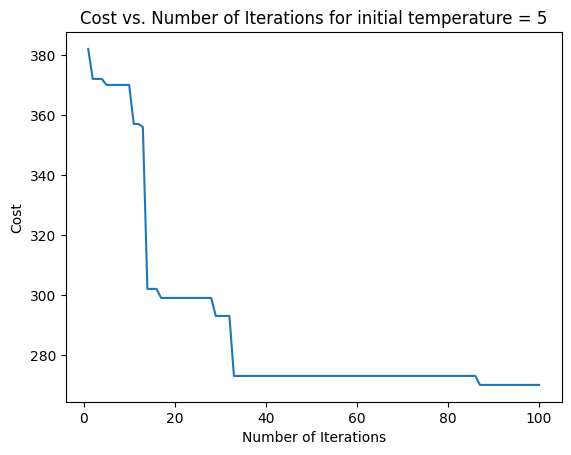

Best solution for initial temperature = 5 is [7, 9, 1, 5, 10, 6, 4, 8, 3, 11, 2]


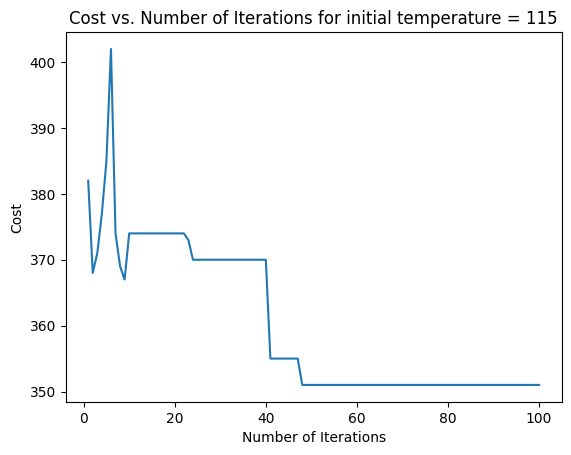

Best solution for initial temperature = 115 is [7, 1, 10, 4, 5, 9, 8, 3, 2, 11, 6]


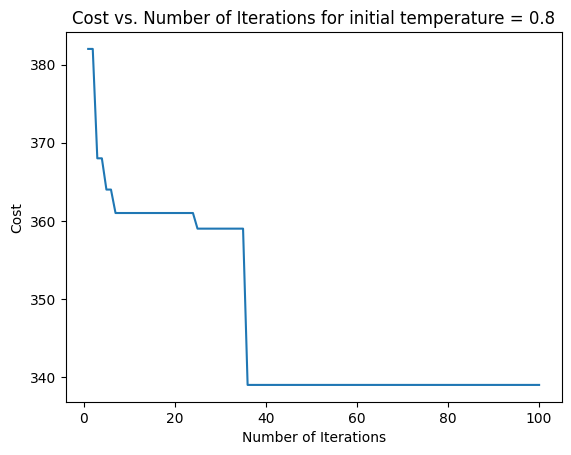

Best solution for initial temperature = 0.8 is [7, 1, 10, 4, 9, 3, 6, 5, 8, 11, 2]


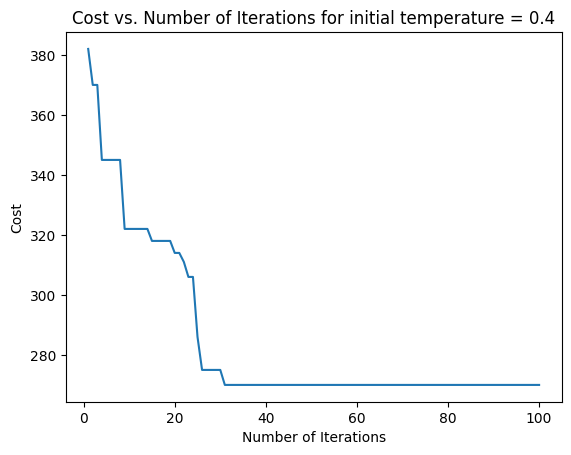

Best solution for initial temperature = 0.4 is [7, 9, 1, 10, 6, 4, 5, 8, 3, 11, 2]


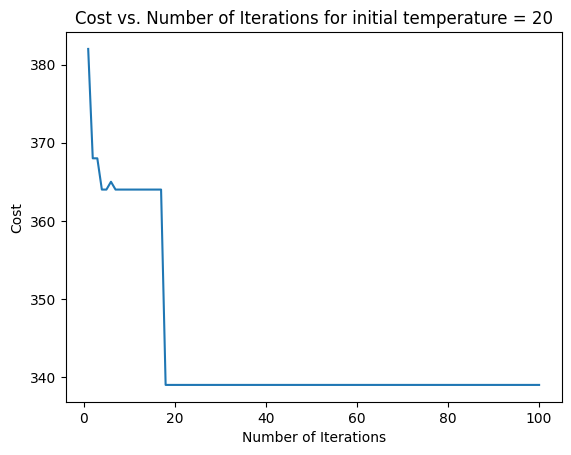

Best solution for initial temperature = 20 is [7, 1, 10, 4, 3, 9, 5, 6, 8, 11, 2]


In [42]:
list_initial_temperatures = [1, 1.5, 0.5, 5, 115, 0.8,0.4,20]
for initial_temperature in list_initial_temperatures:
    result, costs = simulated_annealing_tsp(initial_solution, maxiter, cost_mat, initial_temperature)

    # Plot cost against number of iterations
    plt.plot(range(1, maxiter + 1), costs)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Number of Iterations for initial temperature = {initial_temperature}')
    plt.show()

    # Print best solution
    print(f"Best solution for initial temperature = {initial_temperature} is {result}")


#Question 9

In [43]:
import random

# Define a different cooling schedule
def cooling_schedule_diff(Tk, k):
    return Tk / (k + 1)  # Adjusting the cooling rate

def simulated_annealing_tsp2(initial_solution, maxiter, cost_matrix, T0):
    current_solution = initial_solution
    best_solution = current_solution
    Tk = T0  # Initial temperature
    costs = []  # List to store costs per iteration

    for k in range(maxiter):
        neighbor_solution = neighbour(current_solution)
        current_cost = cost_function(current_solution, cost_matrix)
        neighbor_cost = cost_function(neighbor_solution, cost_matrix)
        Tk = cooling_schedule_diff(Tk, k)

        if neighbor_cost <= current_cost:
            current_solution = neighbor_solution
            if neighbor_cost < cost_function(best_solution, cost_matrix):
                best_solution = neighbor_solution
        else:
            acceptance_prob = accept_prob(current_cost, neighbor_cost, Tk)
            if random.random() < acceptance_prob:
                current_solution = neighbor_solution

        costs.append(current_cost)  # Append current cost to the list

    return best_solution, costs

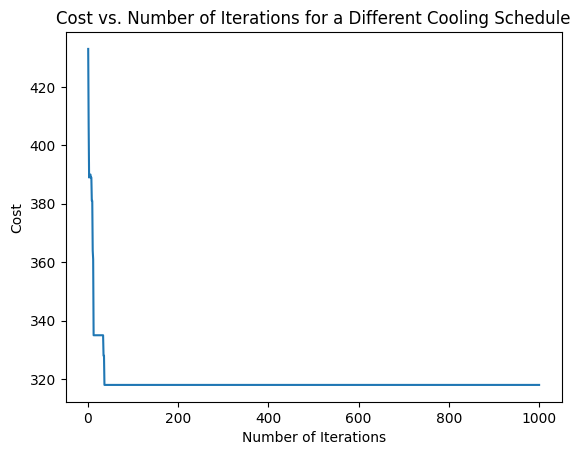

Best solution: [2, 5, 10, 6, 8, 11, 7, 3, 4, 1, 9]


In [44]:
# Example usage:
initial_solution = generate_initial_tour(11)
max_iterations = 1000
cost_matrix = df
initial_temperature = 1

best_solution, costs = simulated_annealing_tsp(initial_solution, max_iterations, cost_matrix, initial_temperature)

# Plot cost against number of iterations
plt.plot(range(1, max_iterations + 1), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a Different Cooling Schedule')
plt.show()

print("Best solution:", best_solution)

- Slower Temperature Decrease: The new cooling schedule decreases the temperature more gradually compared to the original schedule.
- Extended Exploration Phase: The slower temperature decrease allows for a more extended exploration phase of the solution space.
- Reduced Risk of Premature Convergence: This prolonged exploration phase reduces the risk of premature convergence to suboptimal solutions.
- Enhanced Solution Diversity: The algorithm with the new schedule explores a wider range of solutions, potentially leading to a more diverse set of solutions.
- Potential Delay in Convergence: The slower temperature decrease may result in a longer time to converge to the optimal solution.
- Increased Robustness: The algorithm's performance may be more consistent across different problem instances and initial conditions.

#Question 10

In [45]:
df1=pd.read_csv('/content/TSP48.csv' , header=None)

In [46]:
df1.index=[i for i in range(1,49)]
df1.columns=[i for i in range(1,49)]

In [47]:
df1

1     2     3     4     5     6     7     8     9     10  ...    39  \
1      0  4727  1205  6363  3657  3130  2414   563   463  5654  ...  3530   
2   4727     0  3588  2012  1842  6977  6501  5187  5028  2327  ...  3085   
3   1205  3588     0  5163  2458  3678  3071  1742  1444  4462  ...  2482   
4   6363  2012  5163     0  2799  8064  7727  6878  6581  1402  ...  3669   
5   3657  1842  2458  2799     0  5330  4946  4200  3824  2012  ...  1252   
6   3130  6977  3678  8064  5330     0   743  3209  2670  6929  ...  4435   
7   2414  6501  3071  7727  4946   743     0  2468  1952  6673  ...  4185   
8    563  5187  1742  6878  4200  3209  2468     0   718  6203  ...  4091   
9    463  5028  1444  6581  3824  2670  1952   718     0  5789  ...  3543   
10  5654  2327  4462  1402  2012  6929  6673  6203  5789     0  ...  2497   
11  1713  4148  1184  5366  2573  2831  2380  2241  1602  4392  ...  1997   
12  1604  4723  1520  5946  3157  2266  1795  2051  1343  4947  ...  2506   
13  2368  3635  1498  4679  1924  3407  3051  2920  2330  3648  ...  1232   
14  2201  3125  1103  4378  1580  3854  3405  2762  2291  3501  ...  1380   
15  1290  4907  1501  6225  3427  2178  1604  1687   970  5274  ...  2867   
16  1004  3930   951  5709  3179  4076  3382  1304  1451  5183  ...  3398   
17  3833  7463  4298  8417  5749   727  1469  3932  3376  7216  ...  4752   
18  2258  6338  2903  7578  4793   881   168  2331  1796  6535  ...  4051   
19  3419  7243  3967  8296  5577   293  1020  3487  2959  7140  ...  4652   
20  2267  5105  2169  6135  3409  1930  1681  2669  1951  5022  ...  2525   
21  2957  4043  2209  4802  2223  3310  3110  3487  2835  3621  ...  1136   
22   720  4022   652  5707  3066  3672  2993  1175  1112  5077  ...  3132   
23  1700  3677   828  4982  2185  3315  2827  2260  1725  4090  ...  1833   
24  5279  2863  4136  2322  1860  6199  6009  5840  5346   922  ...  1852   
25  2578  3106  1518  4178  1401  3932  3552  3141  2628  3207  ...   967   
26  6076  1850  4873   320  2491  7745  7412  6596  6285  1131  ...  3349   
27  3465  7173  3954  8186  5486   365  1104  3563  3007  7014  ...  4532   
28  2654  6630  3254  7800  5035   482   267  2728  2193  6714  ...  4218   
29  3625  1204  2446  2778   894  5774  5300  4120  3889  2437  ...  2096   
30  3115  6814  3581  7859  5141   261   821  3240  2661  6707  ...  4216   
31  1574  6001  2441  7408  4611  1659   916  1559  1122  6477  ...  4062   
32  3951  3447  2960  3763  1669  4513  4348  4507  3920  2476  ...   533   
33  1748  5253  1966  6461  3677  1746  1270  2082  1372  5432  ...  2963   
34  2142  2656   950  4223  1590  4431  3890  2658  2391  3599  ...  1981   
35  6755  3123  5564  1427  3113  7910  7698  7304  6883  1102  ...  3515   
36  2383  6274  2916  7451  4682   769   332  2512  1927  6376  ...  3883   
37  3306  7183  3878  8263  5533   207   900  3364  2845  7121  ...  4629   
38  1029  5622  2035  7131  4352  2225  1484   985   611  6284  ...  3952   
39  3530  3085  2482  3669  1252  4435  4185  4091  3543  2497  ...     0   
40   825  4564  1027  6011  3227  2681  2049  1319   676  5160  ...  2873   
41  2188  2756  1395  4638  2426  5053  4415  2544  2590  4318  ...  3080   
42  4820  1591  3617  1681  1169  6384  6051  5358  4993   937  ...  2012   
43  3489  7027  3891  7987  5313   550  1219  3632  3039  6795  ...  4324   
44  1947  6186  2686  7502  4706  1224   482  1987  1486  6507  ...  4046   
45  6835  3472  5661  1877  3241  7805  7635  7391  6934  1268  ...  3478   
46  1542  5461  2023  6758  3962  1670  1054  1785  1112  5773  ...  3328   
47  2379  4390  1867  5360  2651  2704  2432  2879  2196  4249  ...  1755   
48  3744  2088  2560  2844   304  5230  4884  4296  3876  1914  ...  1000   

      40    41    42    43    44    45    46    47    48  
1    825  2188  4820  3489  1947  6835  1542  2379  3744  
2   4564  2756  1591  7027  6186  3472  5461  4390  2088  
3   1027  1395  3617  3891  2686  5661  2023  1867  256

In [48]:
n=len(df1)

In [49]:
n

48

revise(3)

In [50]:
import random
num_of_cities=len(df1)

def generate_initial_tour(num_of_cities):
   cities=list(range(1,num_of_cities +1))   #create the list of the cities
   random.shuffle(cities)   #shuffle random tour
   return cities

initial_tour=generate_initial_tour(num_of_cities)

In [51]:
generate_initial_tour(48)

[9,
 17,
 40,
 24,
 1,
 3,
 16,
 41,
 2,
 5,
 36,
 43,
 8,
 27,
 14,
 30,
 39,
 7,
 29,
 44,
 32,
 47,
 4,
 6,
 37,
 19,
 23,
 25,
 21,
 46,
 28,
 10,
 31,
 33,
 12,
 35,
 48,
 34,
 38,
 45,
 42,
 20,
 15,
 13,
 26,
 22,
 18,
 11]

**revise(4)**

In [52]:
def cost_function(tour, cost_matrix):
    total_cost = sum(cost_matrix[tour[i-1]][tour[i]] for i in range(len(tour)))
    return total_cost

revise(5)

In [53]:
def neighbour(tour):
    # Generate a random index to swap
    index = random.randint(0, len(tour) - 2)

    # Create the neighbor by swapping two consecutive cities
    new_tour = tour[:]
    new_tour[index], new_tour[index + 1] = new_tour[index + 1], new_tour[index]
    return new_tour

#Example usage:
current_tour = ['A', 'B', 'C', 'D']
new_tour = neighbour(current_tour)
print("Neighboring tour:", new_tour)

Neighboring tour: ['B', 'A', 'C', 'D']


In [54]:
import math

def cooling_schedule(Tk):
    return 0.8 * Tk
    # Implement logic to update the temperature given by the cooling schedule
def accept_prob(current_cost, old_cost, Tk):
    return math.exp(-(old_cost - current_cost) / Tk)

**revise 7,8 & 9**

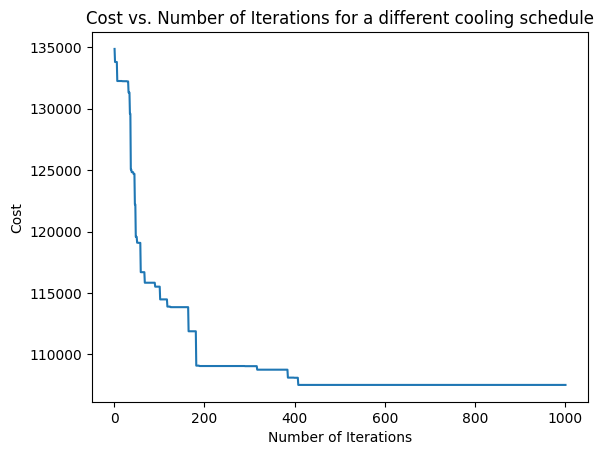

Best solution: [38, 43, 17, 18, 31, 12, 1, 41, 48, 45, 20, 39, 10, 4, 16, 44, 11, 32, 2, 22, 28, 34, 29, 5, 36, 27, 19, 37, 9, 47, 14, 3, 8, 15, 26, 42, 25, 13, 23, 33, 30, 6, 7, 46, 40, 35, 24, 21]


In [55]:
import matplotlib.pyplot as plt

# Define initial solution, maximum iterations, cost matrix, and initial temperature
initial_solution = generate_initial_tour(len(df1))
max_iterations = 1000
cost_matrix = df1
initial_temperature = 1

# Perform simulated annealing
best_solution, costs = simulated_annealing_tsp(initial_solution, max_iterations, cost_matrix, initial_temperature)

# Plot cost against number of iterations
plt.plot(range(1, max_iterations + 1), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

print("Best solution:", best_solution)


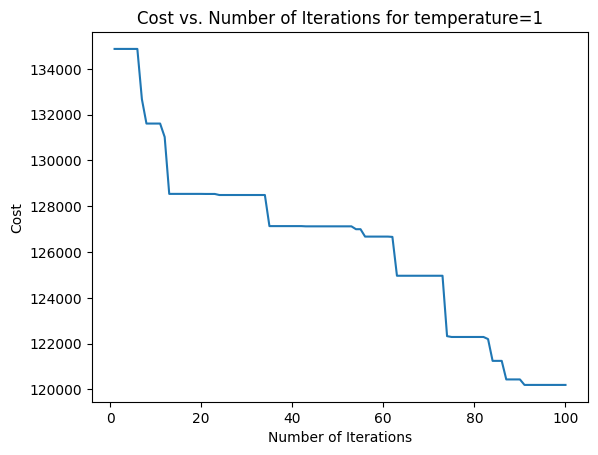

Best solution for temperature=1 is [38, 18, 43, 17, 31, 1, 41, 12, 48, 45, 20, 39, 10, 4, 16, 44, 11, 32, 2, 34, 22, 28, 5, 29, 36, 9, 37, 19, 27, 14, 47, 3, 8, 15, 26, 42, 30, 33, 13, 25, 23, 46, 7, 6, 40, 24, 35, 21]


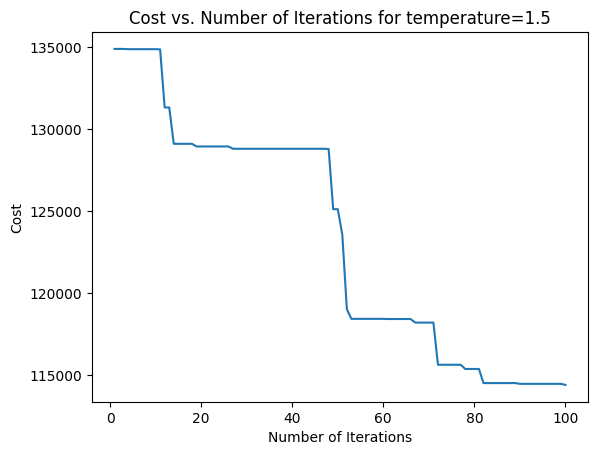

Best solution for temperature=1.5 is [38, 18, 43, 17, 31, 12, 41, 1, 48, 45, 20, 39, 10, 4, 16, 44, 11, 32, 2, 22, 28, 34, 29, 5, 36, 27, 19, 37, 9, 47, 14, 3, 8, 15, 26, 42, 23, 33, 25, 13, 46, 30, 6, 7, 40, 35, 24, 21]


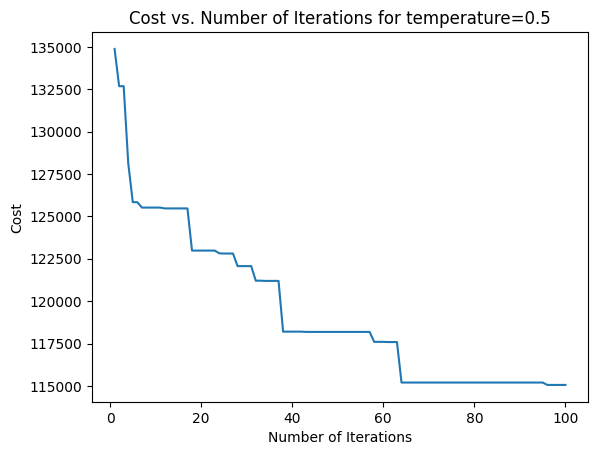

Best solution for temperature=0.5 is [38, 18, 43, 17, 31, 12, 1, 41, 48, 45, 39, 20, 10, 4, 16, 44, 11, 32, 2, 34, 22, 28, 5, 29, 36, 37, 27, 19, 9, 47, 14, 3, 8, 15, 42, 26, 23, 33, 30, 13, 25, 46, 6, 7, 40, 35, 24, 21]


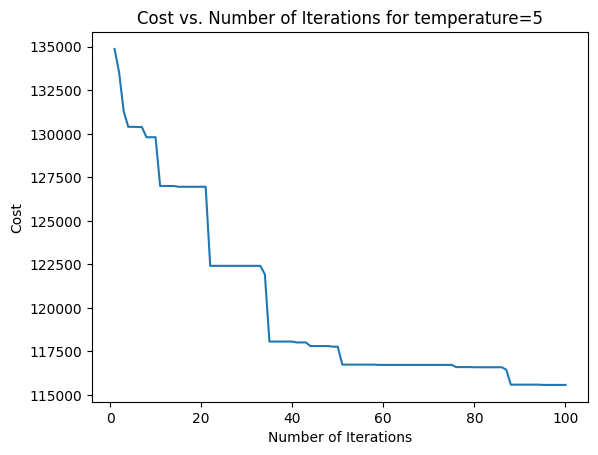

Best solution for temperature=5 is [38, 18, 43, 17, 31, 1, 12, 41, 48, 45, 20, 39, 10, 4, 16, 44, 11, 32, 2, 22, 28, 34, 29, 5, 36, 37, 19, 27, 9, 47, 14, 3, 8, 15, 26, 42, 13, 30, 33, 25, 23, 46, 6, 7, 40, 35, 24, 21]


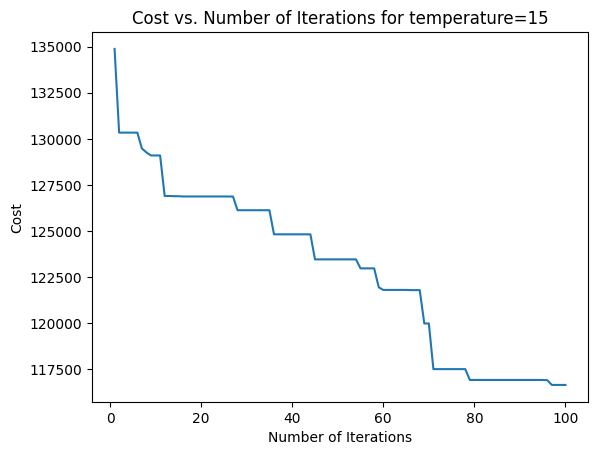

Best solution for temperature=15 is [17, 31, 38, 18, 43, 12, 1, 41, 48, 45, 39, 20, 10, 4, 16, 44, 11, 32, 2, 34, 22, 28, 5, 29, 36, 27, 19, 37, 9, 47, 14, 3, 8, 15, 26, 42, 33, 30, 23, 25, 13, 46, 6, 7, 40, 35, 24, 21]


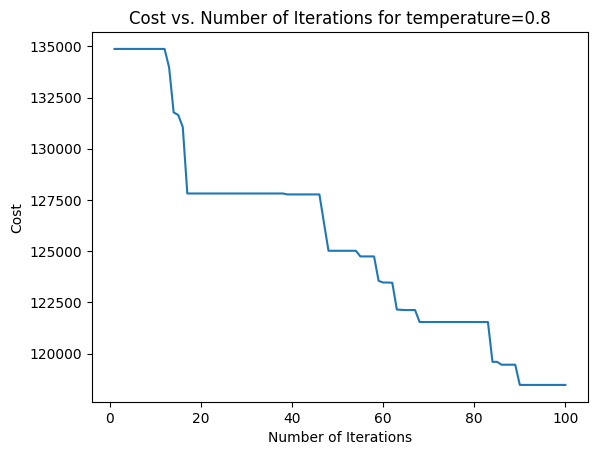

Best solution for temperature=0.8 is [17, 31, 38, 18, 43, 1, 41, 12, 48, 45, 20, 39, 10, 4, 16, 44, 11, 32, 2, 34, 22, 28, 29, 5, 27, 36, 9, 37, 19, 47, 14, 3, 8, 15, 26, 42, 25, 13, 33, 23, 46, 30, 6, 7, 40, 35, 24, 21]


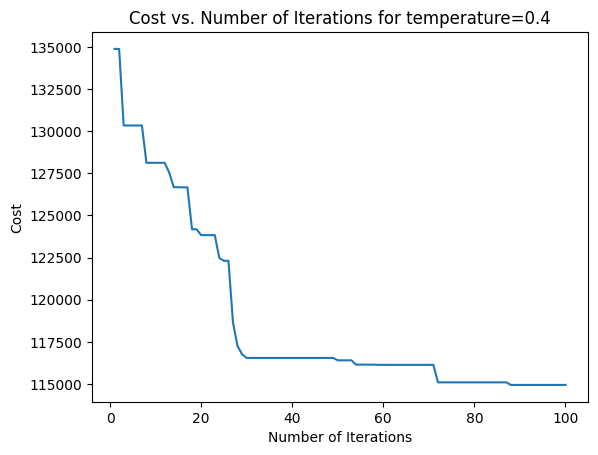

Best solution for temperature=0.4 is [18, 38, 31, 17, 43, 1, 41, 12, 48, 45, 39, 20, 10, 4, 16, 44, 11, 32, 2, 22, 28, 34, 29, 5, 36, 27, 19, 37, 9, 47, 14, 3, 8, 15, 26, 42, 33, 23, 25, 13, 46, 7, 6, 30, 40, 35, 24, 21]


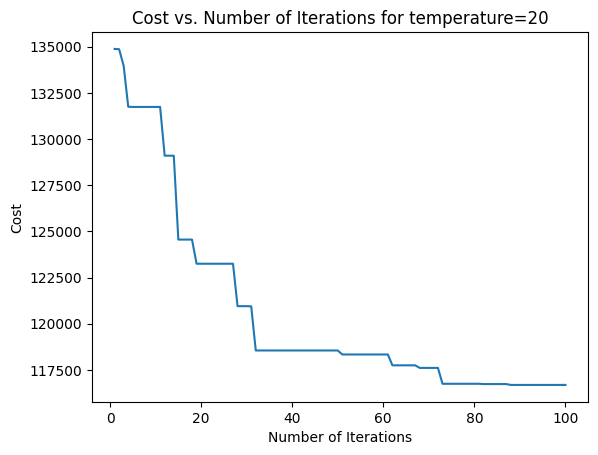

Best solution for temperature=20 is [17, 31, 38, 18, 43, 12, 1, 41, 48, 45, 20, 39, 10, 4, 16, 44, 11, 32, 2, 22, 28, 34, 29, 5, 36, 27, 19, 37, 9, 47, 14, 3, 8, 15, 26, 42, 13, 23, 33, 30, 25, 46, 6, 7, 40, 35, 24, 21]


In [56]:
import matplotlib.pyplot as plt

# Define a list of initial temperatures to test
list_initial_temperatures = [1, 1.5, 0.5, 5, 15, 0.8,0.4,20]

# Perform simulated annealing for each initial temperature and plot results
for initial_temperature in list_initial_temperatures:
    # Perform simulated annealing
    best_solution, costs = simulated_annealing_tsp(initial_solution, maxiter, cost_matrix, initial_temperature)

    # Plot cost against number of iterations
    plt.plot(range(1, maxiter + 1), costs)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Number of Iterations for temperature={initial_temperature}')
    plt.show()

    # Print best solution
    print(f"Best solution for temperature={initial_temperature} is {best_solution}")


**Comment:**For lower initial temperatures, the algorithm tends to converge to a feasible solution more quickly compared to higher initial temperatures. In other words, smaller temperature values lead to faster convergence to a minimum-cost route, requiring fewer iterations. Conversely, larger initial temperatures result in slower convergence, requiring more iterations to find an optimal or near-optimal solution.

<ipython-input-54-a18e059494b0>:7: RuntimeWarning: overflow encountered in divide
  return math.exp(-(old_cost - current_cost) / Tk)
<ipython-input-54-a18e059494b0>:7: RuntimeWarning: divide by zero encountered in divide
  return math.exp(-(old_cost - current_cost) / Tk)


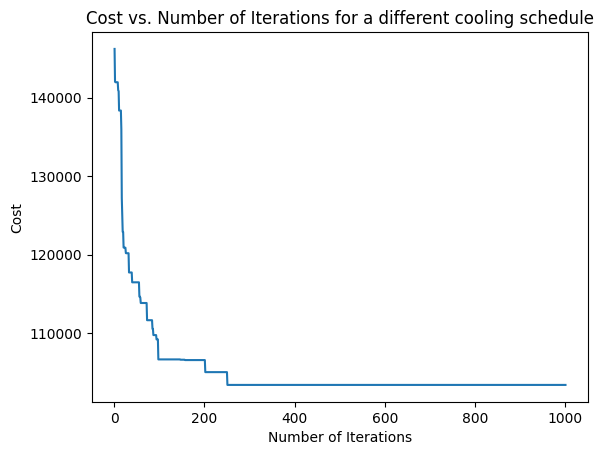

Best solution: [11, 20, 47, 23, 5, 48, 39, 10, 42, 13, 1, 31, 46, 17, 45, 4, 16, 9, 25, 34, 29, 2, 26, 6, 37, 30, 36, 44, 40, 12, 18, 27, 21, 24, 33, 8, 41, 22, 28, 32, 35, 14, 3, 7, 19, 43, 38, 15]


In [57]:
import matplotlib.pyplot as plt

# Define initial solution, maximum iterations, cost matrix, and initial temperature
initial_solution = generate_initial_tour(48)
max_iterations = 1000
cost_matrix = df1
initial_temperature = 1

# Perform simulated annealing with the different cooling schedule
best_solution, costs = simulated_annealing_tsp2(initial_solution, max_iterations, cost_matrix, initial_temperature)

# Plot cost against number of iterations
plt.plot(range(1, max_iterations + 1), costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations for a different cooling schedule')
plt.show()

# Print the best solution found
print("Best solution:", best_solution)
